#  Introduction To Text Classification


Text classification is a fundamental task in data analysis and natural language processing (NLP) that involves categorizing text documents into predefined classes or categories.

It's used in a wide range of applications such as spam detection, sentiment analysis, topic classification, and language identification.

The process of text classification typically involves the following steps:

1.Data Preprocessing: This step involves cleaning and preparing the text data for analysis. It may include removing punctuation, converting text to lowercase, and removing stopwords (commonly used words that do not carry much meaning).

2.Feature Extraction: In this step, the text data is converted into numerical feature vectors that can be used as input to machine learning algorithms. Common techniques for feature extraction in text classification include bag-of-words, TF-IDF (Term Frequency-Inverse Document Frequency), and word embeddings like Word2Vec or GloVe.

3.Model Selection: Once the features are extracted, a machine learning model is selected and trained on the labeled data. Popular models for text classification include Naive Bayes, Logistic Regression, Support Vector Machines (SVM), and more recently, deep learning models like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).

4.Model Evaluation: After training the model, it is evaluated on a separate test dataset to assess its performance. Common evaluation metrics for text classification include accuracy, precision, recall, and F1-score.

5.Deployment and Monitoring: Once the model is trained and evaluated, it can be deployed to classify new unseen text data. It's important to monitor the model's performance over time and retrain it if necessary to maintain its accuracy.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#1
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split










# Importing csv file


In [3]:
df = pd.read_csv('Emotions_training.csv', encoding= 'unicode_escape')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Getting the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


# Viewing the coloums present in dataset

In [17]:
df.columns

Index(['text', 'label'], dtype='object')

# Displaying the present rows and coloums in dataset

In [6]:
df.shape


(16000, 2)

# Describing() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)


In [19]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


# Data Preprocessing

# 1.Fixing Datatype(text column)


In [14]:
string_colms = {'text': 'string',}
df = df.astype(string_colms)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  string
 1   label   16000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 250.1 KB


# Checking for null values if any present


In [15]:
pd.isnull(df).sum()


text     0
label    0
dtype: int64

# Droping the null values


In [16]:
df.dropna(inplace=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Reviewing the content's present in "text" column


In [20]:
df['text'].unique()


<StringArray>
[                                                                                                                                     'i didnt feel humiliated',
                                                 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
                                                                                                             'im grabbing a minute to post i feel greedy wrong',
                                                                 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
                                                                                                                                         'i am feeling grouchy',
                                                                                            'ive been feeling a little burdened lately wasnt sure why that was',
                    

# Converting the  content of "text " column into lower case format

In [3]:
df['text'] = df['text'].str.lower()
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the commas(,) from the "text"column 
 

In [22]:
df['text'] = df['text'].str.replace(',', '')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the new lines using regex from the "text"coloum 


In [23]:
df['text'] = df['text'].replace('\n', '', regex=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the links from the "text"coloum 


In [24]:
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing the alpha numeric words from the "text"coloum 


In [26]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing words containing number 


In [11]:
def remove_words_with_numbers(text):
    return re.sub(r'\b\w*\d\w*\b', '', text)

# Applying the remove_words_with_numbers function to the content column
df['text'] = df['text'].apply(remove_words_with_numbers)

df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


# Removing extra spaces from the "text"coloum 


In [27]:
df['text'] = df['text'].apply(lambda x: ' '.join(x.strip().split()))
df['text'] = df['text'].astype('string')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing special charecters from the "text"coloum 


In [28]:
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# Removing Stopwords from the "text"coloum 


In [29]:
from nltk.corpus import stopwords
", ".join (stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [30]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Applying the function to the content column
df['text'] = df['text'].apply(remove_stopwords)
print(df['text'])

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting tables sub...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: text, Length: 16000, dtype: object


# Stemming

In [10]:
porter = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Applying the function to the text column
df['text'] = df['text'].apply(stem_text)
df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


# Lemmatization
 

In [8]:
def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Extract lemmatized tokens
    lemmatized_tokens = [token.lemma_ for token in doc]
    # Join the lemmatized tokens into a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
df.head(10)

,text,label
0,i didnt feel humili,0
1,i can go from feel so hopeless to so damn hope...,0
2,im grab a minut to post i feel greedi wrong,3
3,i am ever feel nostalg about the fireplac i wi...,2
4,i am feel grouchi,3
5,ive been feel a littl burden late wasnt sure w...,0
6,ive been take or milligram or time recommend a...,5
7,i feel as confu about life as a teenag or as j...,4
8,i have been with petrona for year i feel that ...,1
9,i feel romant too,2


In [35]:
df.sample(5)

,text,label
9672,feeling devastated inner voice within thats na...,0
7034,attended free individual academic consultation...,0
10821,get feeling facebook looking ways get popular,1
12699,could feel stress leaving veins getting wonderful,1
9899,feel world tragic woeful place live,0


# Feature Extraction/Engineering

Feature extraction in data analysis is the process of transforming raw data into a format that is suitable for machine learning algorithms. 

It involves selecting, combining, and transforming the original features (variables) of a dataset to create new, more informative features that can improve the performance of a machine learning model.

Feature extraction is important because it helps to:

1.Reduce dimensionality
2.Improve model performance
3.Deal with sparse or noisy data
4.Enable transfer learning
5.Interpretability

Common techniques for feature extraction include:

1.Principal Component Analysis (PCA): A dimensionality reduction technique that identifies the most important features in the data.

2.Feature scaling: Scaling features to a similar range can improve the performance of some machine learning algorithms.

3.Feature selection: Selecting a subset of the most important features based on statistical tests or machine learning models.

4.Text feature extraction: Techniques like TF-IDF, word embeddings, and topic modeling can be used to extract features from text data.

5.Image feature extraction: Techniques like edge detection, corner detection, and texture analysis can be used to extract features from images.



# Converting the text  data into TF-IDF matrix.

In [40]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger' , 'fear' , 'surprise'],
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)


# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Displaying the TF-IDF matrix
print(tfidf_matrix.toarray())

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


# Performing feature scaling on"label" column of the dataset using StandardScaler



In [44]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature': [10, 20, 30, 40, 50, 60],  # Example numerical feature
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Selecting numerical columns for feature scaling
numerical_cols = ['numerical_feature']

# Creating StandardScaler object
scaler = StandardScaler()

# Fit-transform the numerical data
scaled_numerical_data = scaler.fit_transform(df[numerical_cols])

# Replacing original numerical columns with scaled data
df[numerical_cols] = scaled_numerical_data

# Displaying the DataFrame with scaled numerical data
df.head()


,text,numerical_feature,label
0,sadness,-1.46385,0
1,joy,-0.87831,1
2,love,-0.29277,2
3,anger,0.29277,3
4,fear,0.87831,4


# Selecting the top k features based on ANOVA F-values using feature selection



In [46]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature1': [10, 20, 30, 40, 50, 60],  # Example numerical feature 1
    'numerical_feature2': [4, 5, 6, 7, 8, 9],      # Example numerical feature 2
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Converting text column into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Combineing TF-IDF matrix with numerical features
X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['numerical_feature1', 'numerical_feature2']]], axis=1)
y = df['label']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=2)  # Select top 2 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Display the selected features
print(selected_features)

Index(['numerical_feature1', 'numerical_feature2'], dtype='object')


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Performing Principal Component Analysis (PCA) on text data 

In [45]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
    'numerical_feature1': [10, 20, 30, 40, 50, 60],  # Example numerical feature 1
    'numerical_feature2': [4, 5, 6, 7, 8, 9],      # Example numerical feature 2
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Convert text column into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Combine TF-IDF matrix with numerical features
X = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), df[['numerical_feature1', 'numerical_feature2']]], axis=1)
y = df['label']

# Performing  PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Creating a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Concatenate the label column
df_pca['label'] = y

# Displaying the DataFrame with PCA results
df.head()


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,text,numerical_feature1,numerical_feature2,label
0,sadness,10,4,0
1,joy,20,5,1
2,love,30,6,2
3,anger,40,7,3
4,fear,50,8,4


# Converting the "text" column of dataset into a matrix of word counts. 

In [5]:
data = {
    'text': ['sadness', 'joy', 'love', 'anger' , 'fear' , 'surprise'],
    'label': [0, 1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Creating an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Geting the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Converting the sparse matrix to a dense matrix
X_dense = X.todense()

# Converting the dense matrix to a DataFrame
df_tfidf = pd.DataFrame(X_dense, columns=feature_names)

# Print the TF-IDF matrix
print(df_tfidf.head())


   anger  fear  joy  love  sadness  surprise
0    0.0   0.0  0.0   0.0      1.0       0.0
1    0.0   0.0  1.0   0.0      0.0       0.0
2    0.0   0.0  0.0   1.0      0.0       0.0
3    1.0   0.0  0.0   0.0      0.0       0.0
4    0.0   1.0  0.0   0.0      0.0       0.0


# Model Building / Selection

Model selection or building in data analysis refers to the process of selecting the best model or algorithm to use for a given dataset and problem. 

It involves evaluating different models, tuning their hyperparameters, and selecting the one that performs best according to predefined criteria (e.g, accuracy, precision, recall, etc.)

The process typically includes the following steps:

1.Define the Problem
, 2.Data Preparation
, 3.Model Selection
, 4.Hyperparameter Tuning
, 5.Model Evaluation
, 6.Final Model Training
, 7.Model Testing
, 8.Model Deployment

Model selection is crucial in data analysis as it directly impacts the performance and effectiveness of your analysis. 
A well-selected model can provide more accurate predictions and insights, leading to better decision-making.


# 1.Dividing the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.


In [33]:

# Spliting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Spliting the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Creating train, test, and validation datasets
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})
val_data = pd.DataFrame({'text': X_val, 'label': y_val})

# Print the shapes of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)

#(We split the data into features (X) and labels (y) using X = data['text'] and y = data['label'].)
#(We use the train_test_split function to split the data into train and temporary sets (70% train, 30% temp) using X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42).
#(We further split the temporary set into validation and test sets (40% validation, 60% test) using X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42).
#(We create separate DataFrames for train, test, and validation datasets using train_data = pd.DataFrame({'text': X_train, 'label': y_train}), test_data = pd.DataFrame({'text': X_test, 'label': y_test}), and val_data = pd.DataFrame({'text': X_val, 'label': y_val}).
#(Finally, we print the shapes of the train, test, and validation datasets using)

Train data shape: (11200, 2)
Test data shape: (1920, 2)
Validation data shape: (2880, 2)


# 2.Building Classification Models

Classification models are a type of machine learning model used to predict categorical labels or classes based on input features.These models are used in data analysis to classify data points into different categories or classes.

Some common classification models include:
1.Logistic Regression, 2.Decision Trees, 3.Random Forest, 4.Support Vector Machines (SVM), 5.Gradient Boosting Machines (e.g., XGBoost, LightGBM), 6.Naive Bayes, 7.K-Nearest Neighbors (KNN), 8.Decision Tree

# 1.Logistic Regression Model

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1 .

Logistic Function / Sigmoid Function

1.The sigmoid function is a mathematical function used to map the predicted values to probabilities.
2.It maps any real value into another value within a range of 0 and 1. The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the “S” form.
3.The S-form curve is called the Sigmoid function or the logistic function.
4.In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

Basically their are three types of Logistic Regression:-
1.Binomial
2.Multinomial
3.Ordinal

*Logistic regression is a widely used supervised machine learning algorithm for classification problems. It is a statistical model that aims to predict the probability of a binary or categorical outcome based on one or more independent variables.

In machine learning, logistic regression is used to model the relationship between the input features and the target variable, which can take one of two values (in the case of binary classification) or multiple values (in the case of multinomial classification).


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.93
Testing Accuracy: 0.83
Classification Report (Training Data):
              precision    recall  f1-score   support

     sadness       0.94      0.98      0.96      3232
         joy       0.89      0.98      0.94      3781
        love       0.97      0.74      0.84       870
       anger       0.96      0.90      0.93      1552
        fear       0.95      0.89      0.92      1371
    surprise       0.96      0.62      0.75       394

    accuracy                           0.93     11200
   macro avg       0.95      0.85      0.89     11200
weighted avg       0.93      0.93      0.93     11200


Confusion Matrix (Training Data):
[[3169   42    0   15    5    1]
 [  30 3720   16    5    6    4]
 [  17  203  645    4    1    0]
 [  74   71    1 1397    9    0]
 [  61   60    0   23 1222    5]
 [  29   73    1    4   43  244]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

     sadness       0.87      0.93      0.90

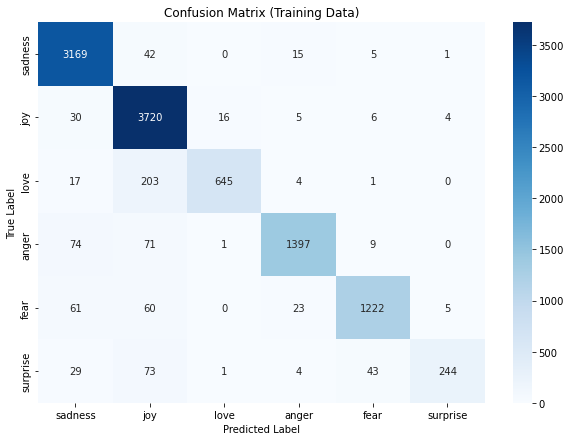

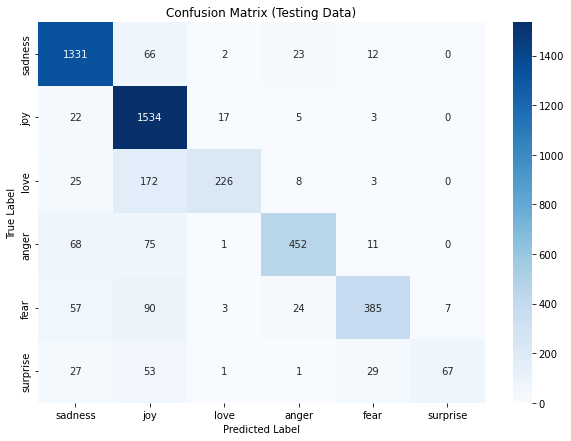

In [4]:
# Loading the dataset
data = pd.read_csv('Emotions_training.csv')

# Spliting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Spliting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transforming the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Defining emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
        
# Creating a LogisticRegression instance
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train_vectorized, y_train)

# Making predictions on the training data
y_train_pred = lr_model.predict(X_train_vectorized)

# Making predictions on the testing data
y_test_pred = lr_model.predict(X_test_vectorized)





# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")




# Generating classification report for training data
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for training data
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Generating classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))






#Generating Confusion Matrix for both traning and testing dataset using "HeatMap" function.

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for training data as a heatmap
plot_confusion_matrix(y_train, y_train_pred, list(emotion_mapping.values()), "Confusion Matrix (Training Data)")

# Plot confusion matrix for testing data as a heatmap
plot_confusion_matrix(y_test, y_test_pred, list(emotion_mapping.values()), "Confusion Matrix (Testing Data)")

# Performing HyperParameter Tuning on Logistic Regression Model Using GridSearchCV

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarn

Best Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Classification Report (Training Data):
              precision    recall  f1-score   support

     sadness       1.00      1.00      1.00      3232
         joy       1.00      1.00      1.00      3781
        love       0.99      0.99      0.99       870
       anger       1.00      1.00      1.00      1552
        fear       0.99      1.00      0.99      1371
    surprise       0.99      0.98      0.99       394

    accuracy                           1.00     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       1.00      1.00      1.00     11200


Confusion Matrix (Training Data):
[[3226    1    0    4    1    0]
 [   1 3769    8    0    2    1]
 [   0    7  863    0    0    0]
 [   3    0    0 1548    1    0]
 [   2    0    0    1 1365    3]
 [   0    1    0    0    5  388]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

     sadness       0.94      0.93      0.94      1434
         joy       0.89      0.94  

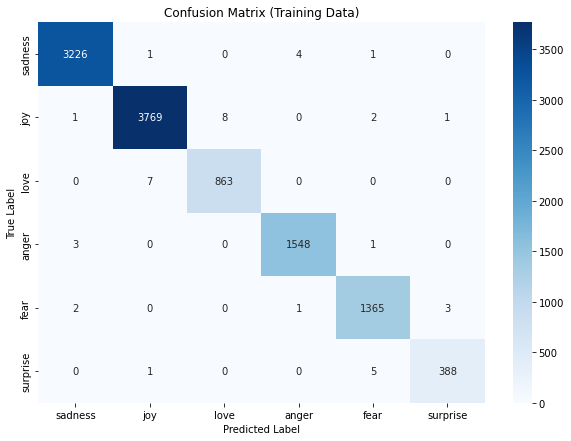

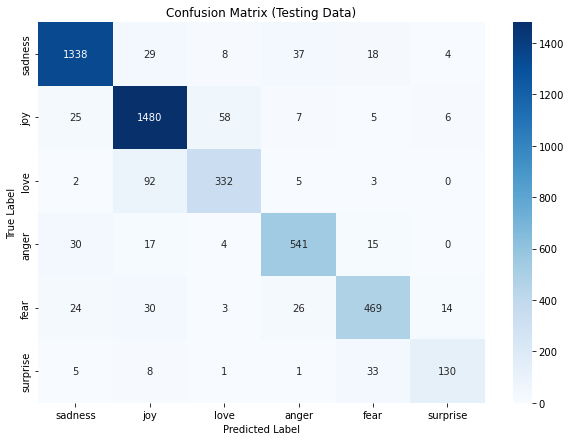

In [4]:
# Loading the dataset
data = pd.read_csv('Emotions_training.csv')

# Splitting the data into features (X) and labels (y)
X = data['text']
y = data['label']

# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transforming the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Defining emotion mapping
emotion_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Creating a LogisticRegression instance
lr_model = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Penalty type (L1 or L2 regularization)
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting  the best model(The best_model is an instance of the LogisticRegression model with the optimal hyperparameters found by the grid search.)
best_model = grid_search.best_estimator_

# Training the best model
best_model.fit(X_train_vectorized, y_train)

# Making predictions on the training data
y_train_pred = best_model.predict(X_train_vectorized)

# Making predictions on the testing data
y_test_pred = best_model.predict(X_test_vectorized)

# Generating classification report for training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for training data
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Generating classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=list(emotion_mapping.values())))

# Generating confusion matrix for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))


#Generating Confusion Matrix for both traning and testing dataset using "HeatMap" function.

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for training data as a heatmap
plot_confusion_matrix(y_train, y_train_pred, list(emotion_mapping.values()), "Confusion Matrix (Training Data)")

# Plot confusion matrix for testing data as a heatmap
plot_confusion_matrix(y_test, y_test_pred, list(emotion_mapping.values()), "Confusion Matrix (Testing Data)")


# 1.Here we use GridSearchCV to perform a grid search over the specified hyperparameters: 'penalty', 'C', and 'solver'. 
# 2.The GridSearchCV object is created with the LogisticRegression model and the parameter grid param_grid. 
# 3.We use 5-fold cross-validation (cv=5) and set the scoring metric to 'accuracy'.
# 4.After fitting the GridSearchCV object to the training data, we print the best hyperparameters found by the grid search (grid_search.best_params_). 
# 5.We then get the best model instance (best_model = grid_search.best_estimator_) and fit it to the training data.
# 6.Next, we make predictions on both the training and test data using the best model. 
# 7.Finally, we generate the classification report and confusion matrix for both the training and test datasets using the classification_report and confusion_matrix functions from sklearn.metrics.
# 8.The output include's the best hyperparameters found by the grid search, followed by the classification report and confusion matrix for both the training and test datasets.


# Resuts:-
# The best hyperparameters found by the grid search are:

#  'penalty': 'l1' (L1 regularization)
#  'C': 10.0 (Inverse of regularization strength)
#  'solver':'saga' (Algorithm to use for optimization)

